In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
import json

In [96]:
dataset = '../../data/caterpillar/labeled_caterpillar_data/labeled_94638_0'
df_ = pd.read_hdf(f'{dataset}.h5', key='star')
print(len(df_))
df_.head()

48124


,jzstar,jrstar,jphistar,vxstar,vystar,vzstar,xstar,ystar,zstar,idstar,...,snapstar,massstar,timestar,redshiftstar,cluster_id,rstar,phistar,vrstar,vphistar,vstar
35353,0.771706,1.066155,-1.248549,-158.509934,110.282841,-160.380032,-0.009334,-0.001382,0.000077,567.0,...,162.0,1.778580e+08,4.228134,1.516271,1,0.009436,-2.994563,140.643193,-132.314764,251.016850
35354,0.073215,1.133259,-0.012431,-25.212583,-30.772049,164.125576,0.000622,0.000267,-0.014710,567.0,...,162.0,1.778580e+08,4.228134,1.516271,1,0.000677,0.404644,-35.291185,-18.360981,168.878056
35355,1.938071,2.291189,0.460224,-54.080167,14.284162,-189.270579,0.006917,0.006683,-0.030814,567.0,...,162.0,1.778580e+08,4.228134,1.516271,1,0.009618,0.768162,-28.968992,47.848711,197.362747
35356,2.481847,2.824102,0.220001,62.981674,-28.856594,-6.744534,0.044120,-0.023708,0.012247,567.0,...,162.0,1.778580e+08,4.228134,1.516271,1,0.050086,-0.493077,69.138273,4.392440,69.605194
35357,1.602451,0.905556,-0.205589,21.133583,-12.044617,182.430322,0.000254,0.009583,0.014926,567.0,...,162.0,1.778580e+08,4.228134,1.516271,1,0.009587,1.544284,-11.480142,-21.445454,184.044895


In [102]:
print(np.min(df_.loc[df_['cluster_id']==119]['idstar']))
print(np.max(df_.loc[df_['cluster_id']==119]['idstar']))

495181.0
495181.0


In [45]:
with open(f'{dataset}_norm.json') as f:
    df_norm_ = json.load(f)

In [46]:
features = ['jzstar', 'jrstar', 'jphistar', 'vxstar', 'vystar', 'vzstar', 'xstar', 'ystar', 'zstar', 'rstar', 'phistar', 'vrstar', 'vphistar', 'vstar', 'estar']

In [48]:
for feature in features:
    df_[feature] -= df_norm_['mean'][feature]
    df_[feature] /= df_norm_['std'][feature]

In [49]:
df_['cluster_id_name'] = [f'cluster {i}' for i in df_['cluster_id']]

<AxesSubplot:xlabel='vstar', ylabel='rstar'>

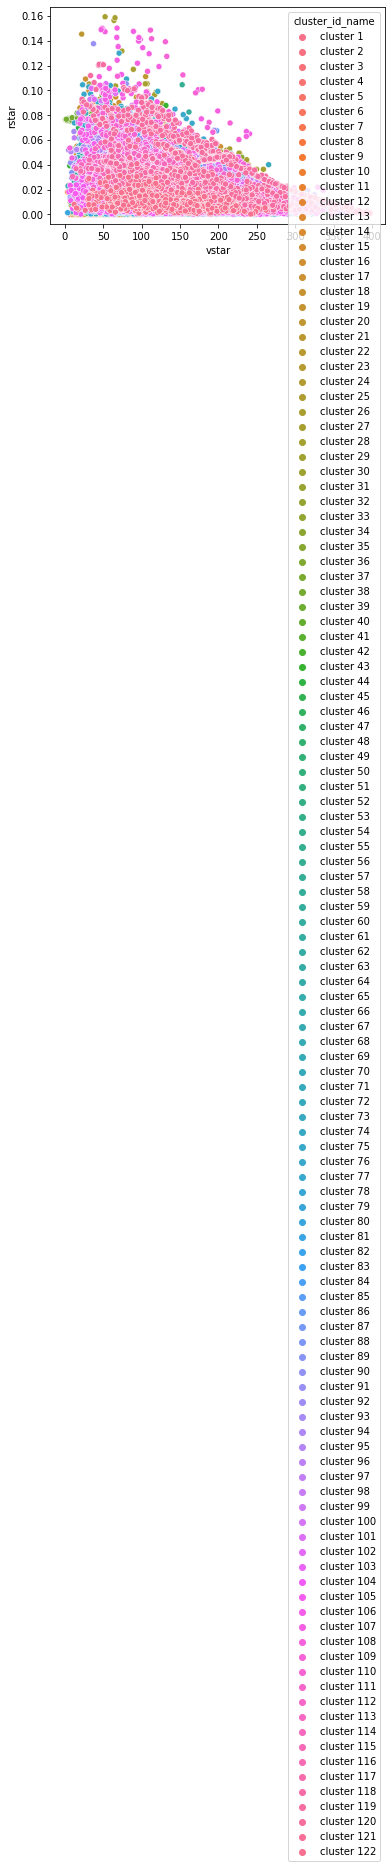

In [4]:
sns.scatterplot(data=df_, x='vstar', y='rstar',hue='cluster_id_name')

In [50]:
df_['jzstar-jrstar'] = df_['jzstar'] - df_['jrstar']

In [51]:
keep_ids = [id for id, count in Counter(df_['cluster_id']).most_common()[:10]]
print(keep_ids)

[105, 96, 54, 40, 48, 119, 2, 34, 43, 90]


In [87]:
chosen_ids = np.argwhere(df_['cluster_id'].isin([90]).to_numpy())[:,0]
df = df_.iloc[chosen_ids].copy()

In [88]:
#chosen_ids = np.random.choice(len(df_), min(len(df_), 2000))
#df_ = df_.iloc[chosen_ids].copy()

[(-3.0, 3.0), (-3.0, 3.0), (-3.0, 3.0), (-3.0, 3.0), (-3.0, 3.0), (-3.0, 3.0)]

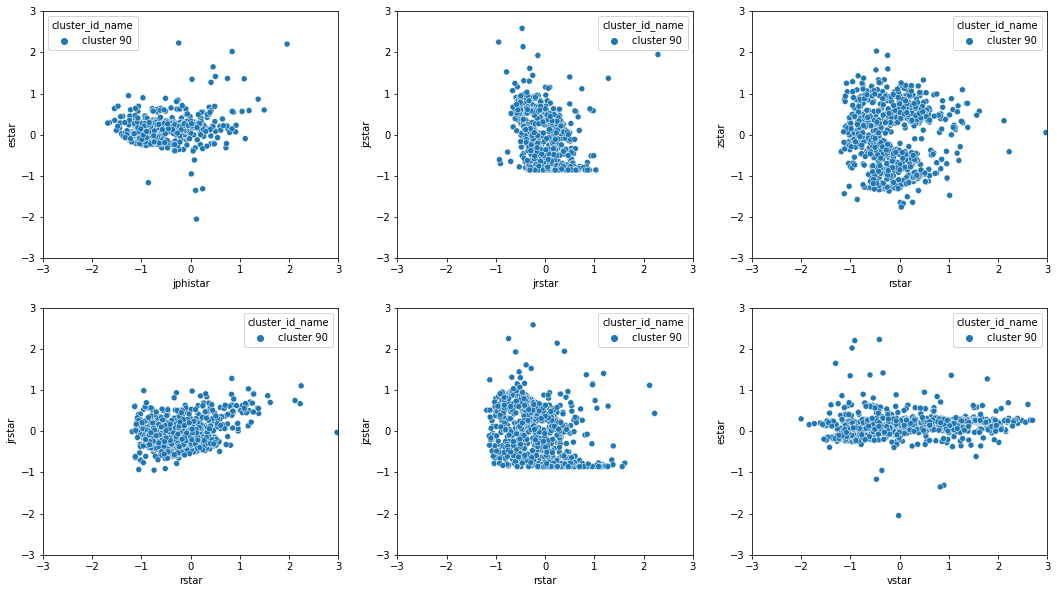

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=df, ax=axes[0,0], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df, ax=axes[0,1], x='jrstar', y='jzstar', hue='cluster_id_name')
sns.scatterplot(data=df, ax=axes[0,2], x='rstar', y='zstar', hue='cluster_id_name')
sns.scatterplot(data=df, ax=axes[1,0], x='rstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df, ax=axes[1,1], x='rstar', y='jzstar', hue='cluster_id_name')
sns.scatterplot(data=df, ax=axes[1,2], x='vstar', y='estar', hue='cluster_id_name')
[ax.set_xlim(-3, 3) for ax in axes.flatten()]
[ax.set_ylim(-3, 3) for ax in axes.flatten()]

[(-3.0, 3.0), (-3.0, 3.0), (-3.0, 3.0), (-3.0, 3.0), (-3.0, 3.0), (-3.0, 3.0)]

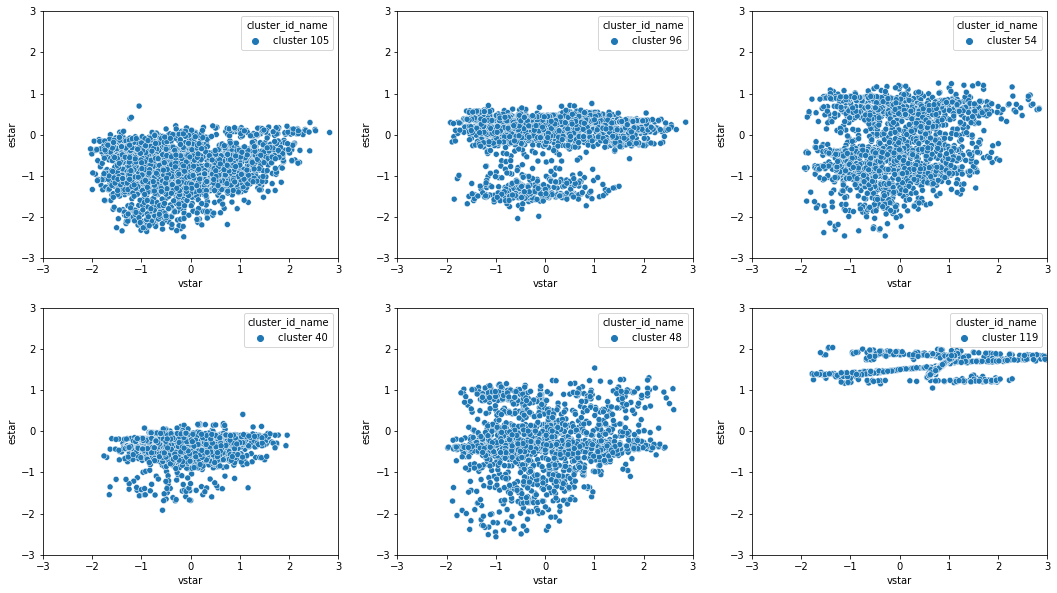

In [95]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for id, ax in zip(keep_ids, axes.flatten()):
    chosen_ids = np.argwhere(df_['cluster_id'].isin([id]).to_numpy())[:,0]
    df = df_.iloc[chosen_ids].copy()
    sns.scatterplot(data=df, ax=ax, x='vstar', y='estar', hue='cluster_id_name')
[ax.set_xlim(-3, 3) for ax in axes.flatten()]
[ax.set_ylim(-3, 3) for ax in axes.flatten()]